In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import Tools
import ROOT

Welcome to JupyROOT 6.24/08


In [2]:
ttt = plt.style.use( Tools.mpl_style_file )
ttt = plt.figure()

<Figure size 700x490 with 0 Axes>

### Loop over all files. Extract fraction

In [3]:
points = []

infiles = sorted(glob('root_files/Proton*.root'))
for infile in infiles:
    energy, scale = infile.split('_')[2:4]
    scale = 1 if( scale=='GeV' ) else 1e3
    energy = float(energy)*scale
    
    TF = ROOT.TFile(infile)
    if( '11-2' in infile ):
        idx = 15
    else:
        idx = 14

    Hist = TF.Get(f'{idx}')
    dd = {}
    dd['bins'] = []
    dd['bin_center'] = []
    dd['values'] = []
    for j in range(1, Hist.GetNbinsX()+1 ):
        dd['bins'].append( Hist.GetBinLowEdge(j) )
        dd['bin_center'].append( Hist.GetBinCenter(j) )
        dd['values'].append( Hist.GetBinContent(j) )
    dd['bins'].append( Hist.GetBinLowEdge(j)+Hist.GetBinWidth(j) )

    count = np.sum(dd['values'][-40:])
    points.append( [energy, count/4e5, np.sqrt(count)/4e5] )
    
points = sorted(points)

In [4]:
x, y, y_err = zip(*points)
np.array(x), np.array(y)

(array([   10.        ,    12.58925412,    15.84893192,    19.95262315,
           25.11886432,    31.6227766 ,    39.81071706,    50.11872336,
           63.09573445,    79.43282347,   100.        ,   125.89254118,
          158.48931925,   199.5262315 ,   251.18864315,   316.22776602,
          398.10717055,   501.18723363,   630.95734448,   794.32823472,
         1000.        ,  1258.92541179,  1584.89319246,  1995.26231497,
         2511.88643151,  3162.27766017,  3981.07170553,  5011.87233627,
         6309.5734448 ,  7943.28234724, 10000.        ]),
 array([0.1047   , 0.097465 , 0.0903725, 0.0842575, 0.07878  , 0.07443  ,
        0.07056  , 0.0670775, 0.064135 , 0.06161  , 0.0595825, 0.05796  ,
        0.056615 , 0.055525 , 0.0546475, 0.0538575, 0.05335  , 0.0529325,
        0.052575 , 0.0523   , 0.052085 , 0.052015 , 0.0519725, 0.0520275,
        0.05197  , 0.0520675, 0.0523225, 0.052495 , 0.0525175, 0.052765 ,
        0.052995 ]))

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


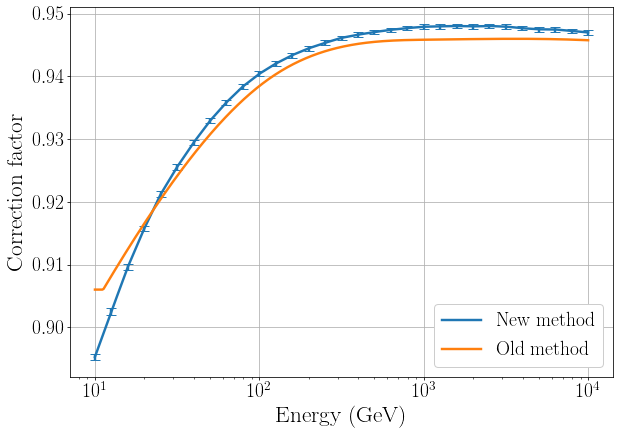

In [5]:
f_corr = lambda xx: np.interp(xx, x, 1-np.array(y))
ttt = plt.errorbar(x, 1-np.array(y), y_err, linestyle='')
xx = np.logspace(1, 4, 401)
# ttt = plt.plot(xx, f_corr(xx), color='tab:blue', label='New method')
ttt = plt.plot(xx, Tools.G4_frac_quasielastic(xx), color='tab:blue', label='New method')

ttt = plt.plot(xx, Tools.Corr_XS_G4(xx),label='Old method')
ttt = plt.ylabel('Correction  factor')
ttt = plt.xlabel('Energy (GeV)')
ttt = plt.xscale('log')
ttt = plt.legend(framealpha=1)
ttt = plt.savefig('Figures/CorrectionFactor.pdf', bbox_inches='tight')

### Make plots

In [20]:
### Load the file

path = 'outfiles/Proton_63.095734448_GeV_1e5-10-05-p01.root'
primary = path.split('_')[2]
TF = ROOT.TFile(path)

In [21]:
if( '11-2' in path ):
    idx1 = 14
else:
    idx1 = 13
rr = range(idx1,idx1+2) 

dd = {}
for i in rr:
    Hist = TF.Get(f'{i}')
    dd[i] = {}
    dd[i]['bins'] = []
    dd[i]['bin_center'] = []
    dd[i]['values'] = []
    for j in range(1, Hist.GetNbinsX()+1 ):
        dd[i]['bins'].append( Hist.GetBinLowEdge(j) )
        dd[i]['bin_center'].append( Hist.GetBinCenter(j) )
        dd[i]['values'].append( Hist.GetBinContent(j) )
    dd[i]['bins'].append( Hist.GetBinLowEdge(j)+Hist.GetBinWidth(j) )
    
    for key in dd[i]:
        dd[i][key] = np.array(dd[i][key])

    print(i, np.sum(dd[i]['values']))

13 400000.0
14 25656.0


In [22]:
print( dd[idx1]['bin_center'][90], len(dd[idx1]['values'][90:]) )
print( np.sum(dd[idx1]['values'][80:]) - 20*np.sum(dd[idx1+1]['values'][80]) )
print( np.sum(dd[idx1]['values'][80:]) - 20*np.sum(dd[idx1]['values'][80]) )

57.101639675440005 10
41190.0
25990.0


Content last bin: 0.05199
Frac where type(max-E-sec)=primary in last bin: 0.8105706267539757


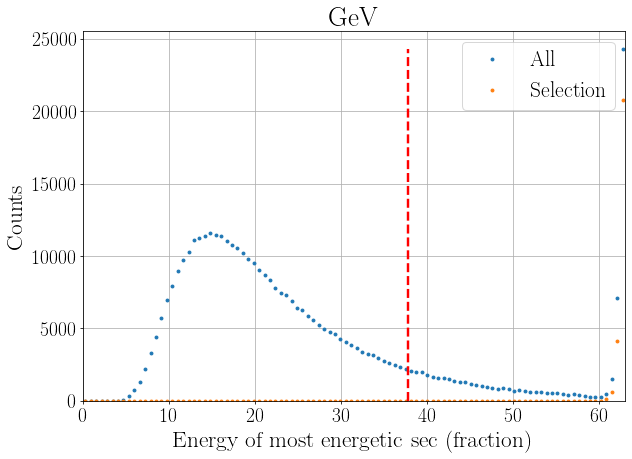

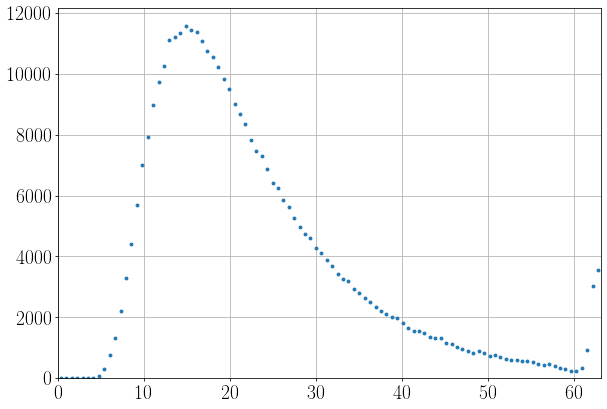

In [23]:
translate = {idx1: 'All', idx1+1: 'Selection'}

for i in rr:
    ttt = plt.plot(dd[i]['bin_center'], dd[i]['values'], marker='.', linestyle='', label=translate[i])
ttt = plt.legend(fontsize=22)
ttt = plt.xlabel('Energy of most energetic sec (fraction)')
ttt = plt.ylabel('Counts')
ttt = plt.title(primary)
ttt = plt.ylim(0,)
ttt = plt.xlim(dd[idx1]['bins'][0],dd[idx1]['bins'][-1])
ttt = plt.plot(2*[0.6*dd[idx1]['bins'][-1],], [0,np.max(dd[idx1]['values'])],
               color='red', linestyle='--')

# A Landau fit is shit --> can't be used
# ttt = plt.savefig(f'{primary}.pdf', bbox_inches='tight')

ttt = plt.figure()
ttt = plt.plot(dd[idx1]['bin_center'], dd[idx1]['values']-dd[idx1+1]['values'], marker='.', linestyle='')
ttt = plt.ylim(0,)
ttt = plt.xlim(dd[idx1]['bins'][0],dd[idx1]['bins'][-1])

print('Content last bin:', dd[idx1+1]['values'][-1]/np.sum(dd[idx1]['values']))
print('Frac where type(max-E-sec)=primary in last bin:', dd[idx1+1]['values'][-1]/np.sum(dd[14]['values']))

In [27]:
Hist = TF.Get('13')

In [28]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
Hist.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


In [29]:
%jsroot on
c.Draw()